In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_10167/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
tabel = pd.DataFrame({
    "A" : [2,1,3],
    "B" : [5,4,0],
    "C" : [1,2,4],
})

In [3]:
tabel

,A,B,C
0,2,5,1
1,1,4,2
2,3,0,4


In [5]:
A = tabel.A
B = tabel.B
C = tabel.C

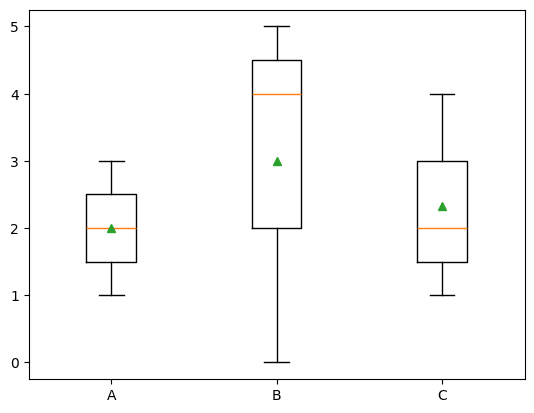

In [10]:
plt.boxplot(tabel, labels=["A","B","C"], showmeans=True)
plt.show()

In [12]:
from scipy import stats

stats.f_oneway(A,B,C)

F_onewayResult(statistic=0.22580645161290325, pvalue=0.8043570000000001)

In [13]:
tabelBaru = pd.melt(tabel,var_name="Merek",value_name="Penjualan")

In [14]:
tabelBaru

,Merek,Penjualan
0,A,2
1,A,1
2,A,3
3,B,5
4,B,4
5,B,0
6,C,1
7,C,2
8,C,4


In [15]:
from statsmodels.formula.api import ols

In [16]:
hasil = ols(formula="Penjualan ~ Merek", data=tabelBaru).fit()

In [18]:
print(hasil.summary())

                            OLS Regression Results                            
Dep. Variable:              Penjualan   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.240
Method:                 Least Squares   F-statistic:                    0.2258
Date:                Tue, 05 Mar 2024   Prob (F-statistic):              0.804
Time:                        15:41:54   Log-Likelihood:                -16.511
No. Observations:                   9   AIC:                             39.02
Df Residuals:                       6   BIC:                             39.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000      1.072      1.867      0.1

/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  k, _ = kurtosistest(a, axis)


In [19]:
from statsmodels.stats.anova import anova_lm

hasil1 = anova_lm(hasil)

In [21]:
hasil1

,df,sum_sq,mean_sq,F,PR(>F)
Merek,2.0,1.555556,0.777778,0.225806,0.804357
Residual,6.0,20.666667,3.444444,NaN,NaN
